# Header

DKE가 뭔지 여기서 차근차근 알아보도록 하자. 
paper가 준 data를 받아서 어떻게 만들었는지 알아보자.

In [1]:
import xarray as xr
import numpy as np

### The paper is reproducible!

이렇게 하니까 Fig 1과 동일한 그림을 그릴 수 있어여ㅛ!
```python
dataset = xr.open_dataset('dataset_paper/pangu1000.nc')
u = dataset['u'].var(dim="ens")
v = dataset['v'].var(dim="ens")
dke = u + v
dke = dke.mean(dim=("lat", "lon"))

# plot in y-axis log scale
dke.plot()
```

In [40]:
dataset = xr.open_dataset('dataset_paper/pangu1000/pangu1000.nc')
# u = dataset['u'].var(dim="ens")
# v = dataset['v'].var(dim="ens")
# dke = u + v
# dke = dke.mean(dim=("lat", "lon"))

# plot in y-axis log scale
dataset.isel(time=24).mean(dim="ens")["vo"]

<xarray.DataArray 'vo' (plev: 1, nsp: 259560, nc2: 2)>
array([[[ 0.0000000e+00,  0.0000000e+00],
        [ 1.7778941e-06,  0.0000000e+00],
        [-2.5997458e-06,  0.0000000e+00],
        ...,
        [ 6.3379389e-08,  1.4713175e-08],
        [-2.4816609e-08, -1.9441318e-08],
        [-2.6778628e-09,  3.6925321e-08]]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2021-06-27
  * plev     (plev) float64 300.0
Dimensions without coordinates: nsp, nc2

In [36]:
data = xr.open_dataset('dataset_paper/pangu1000/pangu1000_dv.nc').isel(time=24)
data

<xarray.Dataset>
Dimensions:  (plev: 1, nsp: 259560, nc2: 2)
Coordinates:
    time     datetime64[ns] 2021-06-27
  * plev     (plev) float64 300.0
Dimensions without coordinates: nsp, nc2
Data variables:
    sd       (plev, nsp, nc2) float32 ...
    svo      (plev, nsp, nc2) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 05 15:14:32 2024: cdo uv2dv,linear tmp.nc pangu1000...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

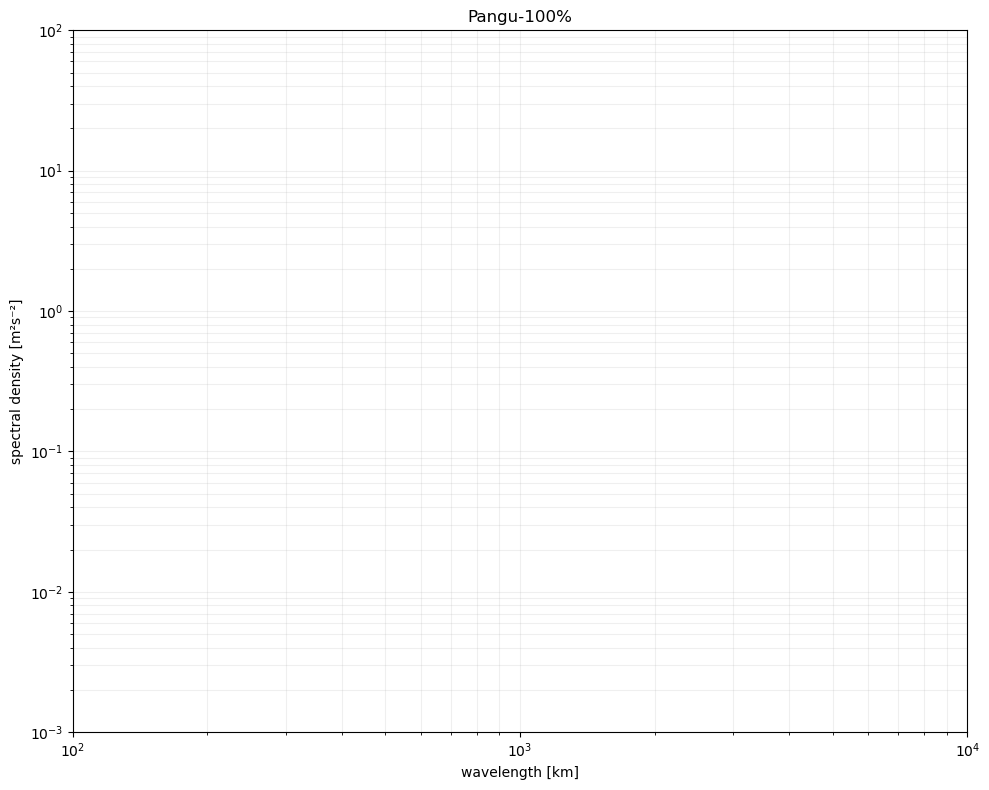

In [24]:
processed = xr.open_dataset('dataset_paper/pangu1000/pangu1000_DKE_n360_sp.nc')

import matplotlib.pyplot as plt

# 데이터 추출 및 플로팅
data = power

# Initialize figure with research-quality specifications
plt.figure(figsize=(10, 8))

# Calculate wavelength array (assuming spherical harmonics)
n360_circumference = 40075  # Earth's circumference in km
wavenumbers = np.arange(1, len(data[0])+1)
wavelengths = n360_circumference / wavenumbers  # Convert to wavelengths in km

# Create loglog plot with reversed x-axis
plt.loglog(wavelengths, data[0], 'k-', linewidth=1.5, label='Total KE')

# Configure axes
plt.gca().invert_xaxis()  # Reverse x-axis direction
plt.grid(True, which="both", ls="-", alpha=0.2)

# Set labels with units
plt.xlabel('wavelength [km]')
plt.ylabel('spectral density [m²s⁻²]')
plt.title('Pangu-100%')

# Set axis limits to match reference plot
plt.xlim(10**2, 10**4)
plt.ylim(10**-3, 10**2)

plt.tight_layout()
plt.show()

In [ ]:
import xarray as xr
from cdo import Cdo

# CDO instance 생성
cdo = Cdo()

# 파일명 설정
input_file = "dataset.nc"
gaussian_file = "dataset_gaussian.nc"
div_spectral_output = "div_spectral.nc"
vo_spectral_output = "vo_spectral.nc"
dke_spectral_output = "dke_spectral.nc"

# Step 1: Gaussian Grid Interpolation (N360)
cdo.remap("n360", input=input_file, output=gaussian_file)

# Step 2: Calculate Divergence and Vorticity
cdo.div(input=gaussian_file, output=div_spectral_output)
cdo.vor(input=gaussian_file, output=vo_spectral_output)

# Step 3: Calculate Difference Kinetic Energy (DKE) Spectrum
cdo.sqrt(input=f"-add -sqr {div_spectral_output} -sqr {vo_spectral_output}", output=dke_spectral_output)

# Load and inspect the outputs (Optional)
div_spectral = xr.open_dataset(div_spectral_output)
vo_spectral = xr.open_dataset(vo_spectral_output)
dke_spectral = xr.open_dataset(dke_spectral_output)

# 결과 출력 (선택 사항)
print(div_spectral)
print(vo_spectral)
print(dke_spectral)


ModuleNotFoundError: No module named 'cdo'